In [168]:
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import time
import seaborn as sns

In [2]:
prices=pd.DataFrame()

try:
    prices = pd.read_csv('C:\\Pessoal\\Pós IA\\15. TCC\\Prática\\Datasets\\Base_B3.csv', engine='python', sep=';',index_col=0, parse_dates=True)
except OSError:
    print('Não existe o arquivo')
    prices=pd.DataFrame()

In [126]:
prices

,BTOW3_Abertura,BTOW3_Fechamento,BTOW3_Movimento,LAME4_Abertura,LAME4_Fechamento,LAME4_Movimento,GOAU4_Abertura,GOAU4_Fechamento,GOAU4_Movimento,MRVE3_Abertura,...,ITUB4_Movimento,BBDC4_Abertura,BBDC4_Fechamento,BBDC4_Movimento,VALE3_Abertura,VALE3_Fechamento,VALE3_Movimento,PETR4_Abertura,PETR4_Fechamento,PETR4_Movimento
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,62.87,65.18,2.31,26.00,26.80,0.80,9.37,9.68,0.31,21.77,...,0.75,33.21,34.10,0.89,53.98,54.33,0.35,30.51,30.70,0.19
2020-01-03,64.44,64.30,-0.14,26.46,26.85,0.39,9.41,9.70,0.29,21.90,...,0.13,33.55,34.10,0.55,53.68,53.93,0.25,30.88,30.45,-0.43
2020-01-06,64.02,63.90,-0.12,26.77,26.54,-0.23,9.60,9.65,0.05,22.20,...,-0.48,33.82,33.49,-0.33,53.80,53.61,-0.19,30.43,30.81,0.38
2020-01-07,64.00,63.74,-0.26,26.53,26.01,-0.52,9.61,9.72,0.11,21.93,...,-0.86,33.41,32.91,-0.50,53.50,54.00,0.50,30.82,30.69,-0.13
2020-01-08,63.70,64.59,0.89,26.03,25.82,-0.21,9.70,9.66,-0.04,21.89,...,-0.83,33.06,32.40,-0.66,54.20,54.01,-0.19,30.69,30.50,-0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,77.55,75.97,-1.58,25.05,24.88,-0.17,11.19,10.90,-0.29,19.21,...,0.08,26.76,27.10,0.34,86.86,86.94,0.08,27.20,27.28,0.08
2020-12-23,76.30,75.60,-0.70,24.93,25.16,0.23,10.87,11.07,0.20,19.23,...,0.62,27.32,27.72,0.40,86.53,87.36,0.83,27.43,27.95,0.52
2020-12-28,76.09,77.04,0.95,25.31,26.06,0.75,11.15,11.09,-0.06,19.13,...,-0.05,28.10,27.99,-0.11,87.79,87.31,-0.48,28.36,28.18,-0.18


In [ ]:
tickers = [ 'ITUB4', 'BBDC4', 'VALE3', 'PETR4']

for t in tickers:
    prices[t+'_Abertura']=np.round(data.DataReader(t+'.SA', data_source='yahoo', 
                                                   start='2020-1-1', end='2020-12-31')['Open'], decimals= 2)
    prices[t+'_Fechamento']=np.round(data.DataReader(t+'.SA', data_source='yahoo', start='2020-1-1', 
                                            end='2020-12-31')['Close'], decimals= 2)
    prices[t+'_Movimento']=np.round(prices[t+'_Fechamento']-prices[t+'_Abertura'], decimals= 2)
    
prices = prices.dropna(axis=1)

prices.to_csv('C:\\Pessoal\\Pós IA\\15. TCC\\Prática\\Datasets\\Base_B3.csv', sep=';')

In [127]:
prices_mov=pd.DataFrame()
a=-1
for i in range(int(len(prices.columns)/3)):
    a = a+3
    b = prices.iloc[:,a].name
    prices_mov[b]= prices.iloc[:,a]

In [162]:
prices_mov.columns.str.replace("_Movimento","")

Index(['BTOW3', 'LAME4', 'GOAU4', 'MRVE3', 'ITUB4', 'BBDC4', 'VALE3', 'PETR4'], dtype='object')

In [199]:
normalizer = Normalizer()

StandardScaler = StandardScaler()

MinMaxScaler = MinMaxScaler()

In [141]:
z = pd.DataFrame(normalizer.fit_transform(prices_mov.T) )

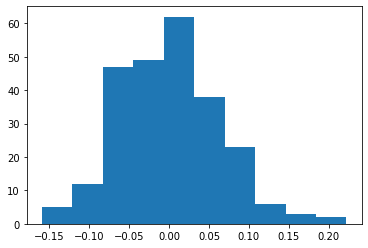

In [148]:
plt.hist(z.T[6])
plt.show()

In [217]:
# Instanciar e normalizar os preços das ações
Sum_of_squared_distances = []

for i in range(2,len(prices_mov.columns)):
    pca=PCA(n_components=2)
    kmeans = KMeans(init='k-means++', n_clusters=i, max_iter=100)
    pipeline = make_pipeline(normalizer, pca, kmeans)
    pipeline.fit_transform(prices_mov.T)
    y = pipeline.predict(prices_mov.T)
    Sum_of_squared_distances.append(kmeans.inertia_)
    #print('calinski:',i, calinski_harabasz_score(prices_mov.T, y))
    print('silhouette:',i, silhouette_score(prices_mov.T, y))

silhouette: 2 0.4210523803128523
silhouette: 3 -0.002176057148099153
silhouette: 4 0.0014150587590523456
silhouette: 5 -0.03120416401569935
silhouette: 6 0.04437272932760228
silhouette: 7 0.1170078490675473


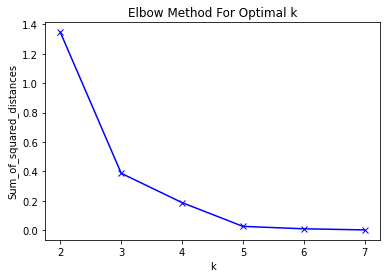

In [218]:
plt.plot(range(2,len(prices_mov.columns)), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [238]:
pca=PCA(n_components=2)
kmeans = KMeans(init='k-means++', n_clusters=5, max_iter=10)
pipeline = make_pipeline(normalizer, pca, kmeans)
pipeline.fit_transform(prices_mov.T)
y = pipeline.predict(prices_mov.T)

df = pd.DataFrame({'labels': y, 'companies': prices_mov.columns.str.replace("_Movimento","")})

In [239]:
df.sort_values('labels')

,labels,companies
0,0,BTOW3
1,0,LAME4
7,1,PETR4
4,2,ITUB4
5,2,BBDC4
2,3,GOAU4
6,3,VALE3
3,4,MRVE3


In [225]:
A = ['ITUB4', 'BBDC4']

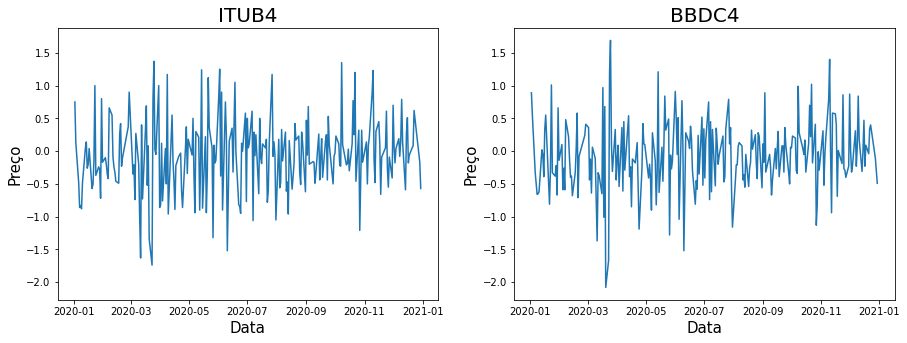

In [226]:
#Nesta visualização, vemos que o tamanho do movimento é afetado pelo valor da ação
plt.figure(1, figsize = (15,5)) 
ax1 = plt.subplot(1,2,1) 
plt.title(A[0],fontsize = 20)
plt.xlabel('Data',fontsize = 15)
plt.ylabel('Preço',fontsize = 15)
plt.plot(prices_mv_norm.T.index, prices_mov[A[0]+'_Movimento'])
plt.subplot(1,2,2, sharey = ax1) 
plt.title(A[1],fontsize = 20)
plt.xlabel('Data',fontsize = 15)
plt.ylabel('Preço',fontsize = 15)
plt.plot(prices_mv_norm.T.index, prices_mov[A[1]+'_Movimento'])
plt.show()

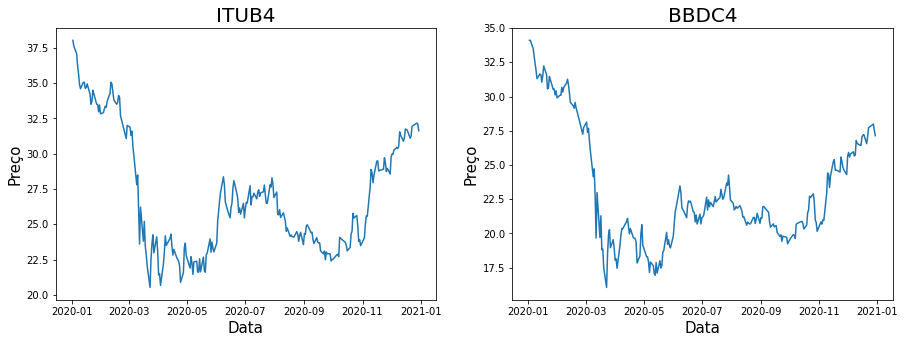

In [227]:
plt.figure(1, figsize = (15,5)) 
ax1 = plt.subplot(1,2,1) 
plt.title(A[0],fontsize = 20)
plt.xlabel('Data',fontsize = 15)
plt.ylabel('Preço',fontsize = 15)
plt.plot(prices.index, prices[A[0]+'_Fechamento'])
plt.subplot(1,2,2) 
plt.title(A[1],fontsize = 20)
plt.xlabel('Data',fontsize = 15)
plt.ylabel('Preço',fontsize = 15)
plt.plot(prices.index, prices[A[1]+'_Fechamento'])
plt.show()

Em contrapartida, conseguimos identificar um movimento muito parecido em empresas de segmentos totalmente diferentes, Lojas Renner (Varejo) e YDUQS (Educacional), possuem comportamento muito parecido.

Fazendo com que tenhamos também uma falha na diversificação, caso escolhamos essas duas empresas para compor a mesma carteira.

In [240]:
B=['BTOW3', 'LAME4']

C:\Users\929001115\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


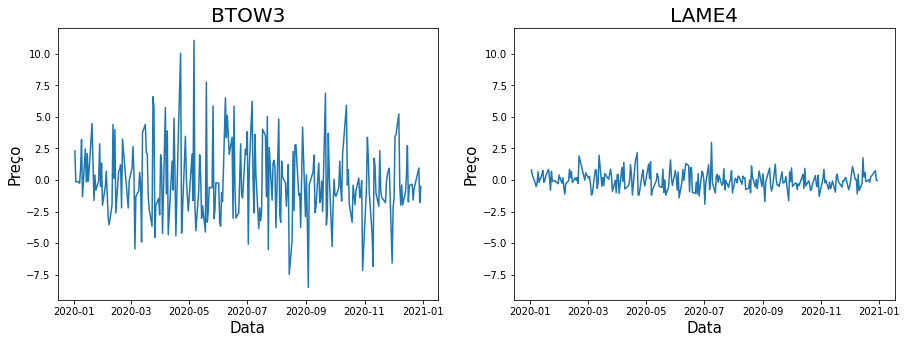

In [242]:
plt.figure(1, figsize = (15,5)) 
ax1 = plt.subplot(1,2,1) 
plt.title(B[0],fontsize = 20)
plt.xlabel('Data',fontsize = 15)
plt.ylabel('Preço',fontsize = 15)
plt.plot(prices_mv_norm.T.index, prices_mov[B[0]+'_Movimento'])
plt.subplot(1,2,2, sharey = ax1) 
plt.title(B[1],fontsize = 20)
plt.xlabel('Data',fontsize = 15)
plt.ylabel('Preço',fontsize = 15)
plt.plot(prices_mv_norm.T.index, prices_mov[B[1]+'_Movimento'])
plt.show()

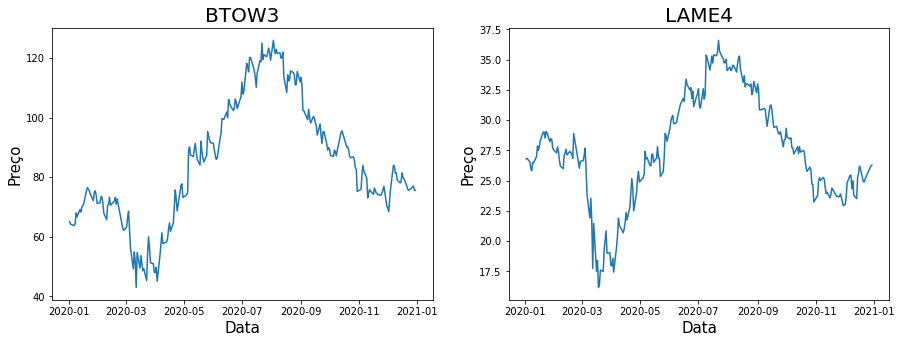

In [243]:
plt.figure(1, figsize = (15,5)) 
ax1 = plt.subplot(1,2,1) 
plt.title(B[0],fontsize = 20)
plt.xlabel('Data',fontsize = 15)
plt.ylabel('Preço',fontsize = 15)
plt.plot(prices.index, prices[B[0]+'_Fechamento'])
plt.subplot(1,2,2) 
plt.title(B[1],fontsize = 20)
plt.xlabel('Data',fontsize = 15)
plt.ylabel('Preço',fontsize = 15)
plt.plot(prices.index, prices[B[1]+'_Fechamento'])
plt.show()

Com isso, através da utilização de análise não supervisionada, podemos agrupar as ações com movimentos mais parecidos e conseguir então um diversificação muito mais efetiva.

   labels companies
4       0     ITUB4
5       0     BBDC4
0       1     BTOW3
1       1     LAME4
2       2     GOAU4
6       2     VALE3
3       3     MRVE3
7       4     PETR4


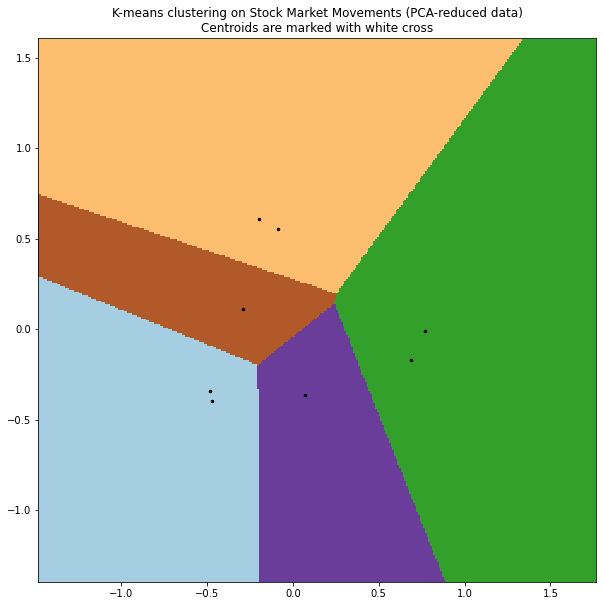

In [237]:
# Visualize the results on PCA-reduced data
# Principal component analysis (PCA)
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space
prices_mov_nm = normalizer.fit_transform(prices_mov.T)
reduced_data = PCA(n_components=2).fit_transform(prices_mov_nm)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=100)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': prices_mov.columns.str.replace("_Movimento","")})

# Display df sorted by cluster label
print(df.sort_values('labels'))

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define Colormap
cmap = plt.cm.Paired

plt.figure(figsize=(10, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
#centroids = kmeans.cluster_centers_
#plt.scatter(centroids[:, 0], centroids[:, 1],
#            marker='x', s=169, linewidths=3,
#            color='w', zorder=10)
plt.title('K-means clustering on Stock Market Movements (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()